# Reshape

**Prerequisites**

- [pandas intro](https://datascience.quantecon.org/intro.html)  
- [pandas basics](https://datascience.quantecon.org/basics.html)  
- [Importance of index](https://datascience.quantecon.org/the_index.html)  


**Outcomes**

- Understand and be able to apply the `melt`/`stack`/`unstack`/`pivot` methods  
- Practice transformations of indices  
- Understand tidy data  

In [1]:
# Uncomment following line to install on colab
! pip install qeds

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

## Outline

- [Reshape](#Reshape)  
  - [Tidy Data](#Tidy-Data)  
  - [Reshaping your Data](#Reshaping-your-Data)  
  - [Long vs Wide](#Long-vs-Wide)  
  - [`set_index`, `reset_index`, and Transpose](#`set_index`,-`reset_index`,-and-Transpose)  
  - [`stack` and `unstack`](#`stack`-and-`unstack`)  
  - [`melt`](#`melt`)  
  - [`pivot` and `pivot_table`](#`pivot`-and-`pivot_table`)  
  - [Visualizing Reshaping](#Visualizing-Reshaping)  
  - [Exercises](#Exercises)  

## Tidy Data

While pushed more generally in the `R` language, the concept of “[tidy data](https://en.wikipedia.org/wiki/Tidy_data)” is helpful in understanding the
objectives for reshaping data, which in turn makes advanced features like
[GroupBy](https://datascience.quantecon.org/groupby.html) more seamless.

Hadley Wickham gives a terminology slightly better-adapted for the experimental
sciences, but nevertheless useful for the social sciences.

> A dataset is a collection of values, usually either numbers (if
quantitative) or strings (if qualitative). Values are organized in two
ways. Every value belongs to a variable and an observation. A variable
contains all values that measure the same underlying attribute (like
height, temperature, duration) across units. An observation contains all
values measured on the same unit (like a person, or a day, or a race)
across attributes. – [Tidy Data (Journal of Statistical Software 2013)](https://www.jstatsoft.org/index.php/jss/article/view/v059i10/v59i10.pdf)


With this framing,

> A dataset is messy or tidy depending on how rows, columns and tables are
matched with observations, variables, and types. In tidy data:
1.  Each variable forms a column.
2.  Each observation forms a row.
3.  Each type of observational unit forms a table.


The “column” and “row” terms map directly to pandas columns and rows, while the
“table” maps to a pandas DataFrame.

With this thinking and interpretation, it becomes essential to think through
what uniquely identifies an “observation” in your data.

Is it a country? A year? A combination of country and year?

These will become the indices of your DataFrame.

For those with more of a database background, the “tidy” format matches the
[3rd normal form](https://en.wikipedia.org/wiki/Third_normal_form) in
database theory, where the referential integrity of the database is maintained
by the uniqueness of the index.

When considering how to map this to the social sciences, note that
reshaping data can change what we consider to be the variable and
observation in a way that doesn’t occur within the natural sciences.

For example, if the “observation” uniquely identified by a country and year and
the “variable” is GDP, you may wish to reshape it so that the “observable” is a
country, and the variables are a GDP for each year.

A word of caution: The tidy approach, where there is no redundancy and each
type of observational unit forms a table, is a good approach for storing data,
but you will frequently reshape/merge/etc. in order to make graphing or
analysis easier.  This doesn’t break the tidy format since those examples are
ephemeral states used in analysis.

## Reshaping your Data

The data you receive is not always in a “shape” that makes it easy to analyze.

What do we mean by shape? The number of rows and columns in a
DataFrame and how information is stored in the index and column names.

This lecture will teach you the basic concepts of reshaping data.

As with other topics, we recommend reviewing the [pandas
documentation](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
on this subject for additional information.

We will keep our discussion here as brief and simple as possible because
these tools will reappear in subsequent lectures.

In [3]:
url = "https://datascience.quantecon.org/assets/data/bball.csv"
bball = pd.read_csv(url)
bball.info()

bball

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
Year        9 non-null int64
Player      9 non-null object
Team        9 non-null object
TeamName    9 non-null object
Games       9 non-null int64
Pts         9 non-null float64
Assist      9 non-null float64
Rebound     9 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 704.0+ bytes


,Year,Player,Team,TeamName,Games,Pts,Assist,Rebound
0,2015,Curry,GSW,Warriors,79,30.1,6.7,5.4
1,2016,Curry,GSW,Warriors,79,25.3,6.6,4.5
2,2017,Curry,GSW,Warriors,51,26.4,6.1,5.1
3,2015,Durant,OKC,Thunder,72,28.2,5.0,8.2
4,2016,Durant,GSW,Warriors,62,25.1,4.8,8.3
5,2017,Durant,GSW,Warriors,68,26.4,5.4,6.8
6,2015,Ibaka,OKC,Thunder,78,12.6,0.8,6.8
7,2016,Ibaka,ORL,Magic,56,15.1,1.1,6.8
8,2016,Ibaka,TOR,Raptors,23,14.2,0.7,6.8


## Long vs Wide

Many of these operations change between long and wide DataFrames.

What does it mean for a DataFrame to be long or wide?

Here is long possible long-form representation of our basketball data.

In [4]:
# Don't worry about what this command does -- We'll see it soon
bball_long = bball.melt(id_vars=["Year", "Player", "Team", "TeamName"])

bball_long

,Year,Player,Team,TeamName,variable,value
0,2015,Curry,GSW,Warriors,Games,79.0
1,2016,Curry,GSW,Warriors,Games,79.0
2,2017,Curry,GSW,Warriors,Games,51.0
3,2015,Durant,OKC,Thunder,Games,72.0
4,2016,Durant,GSW,Warriors,Games,62.0
5,2017,Durant,GSW,Warriors,Games,68.0
6,2015,Ibaka,OKC,Thunder,Games,78.0
7,2016,Ibaka,ORL,Magic,Games,56.0
8,2016,Ibaka,TOR,Raptors,Games,23.0
9,2015,Curry,GSW,Warriors,Pts,30.1


And here is a wide-form version.

In [5]:
# Again, don't worry about this command... We'll see it soon too
bball_wide = bball_long.pivot_table(
    index="Year",
    columns=["Player", "variable", "Team"],
    values="value"
)
bball_wide

Player    Curry                     Durant                               ...  \
variable Assist Games   Pts Rebound Assist      Games         Pts        ...   
Team        GSW   GSW   GSW     GSW    GSW  OKC   GSW   OKC   GSW   OKC  ...   
Year                                                                     ...   
2015        6.7  79.0  30.1     5.4    NaN  5.0   NaN  72.0   NaN  28.2  ...   
2016        6.6  79.0  25.3     4.5    4.8  NaN  62.0   NaN  25.1   NaN  ...   
2017        6.1  51.0  26.4     5.1    5.4  NaN  68.0   NaN  26.4   NaN  ...   

Player    Ibaka                                                        
variable Assist Games               Pts             Rebound            
Team        TOR   OKC   ORL   TOR   OKC   ORL   TOR     OKC  ORL  TOR  
Year                                                                   
2015        NaN  78.0   NaN   NaN  12.6   NaN   NaN     6.8  NaN  NaN  
2016        0.7   NaN  56.0  23.0   NaN  15.1  14.2     NaN  6.8  6.8  
2017        NaN   NaN   NaN   NaN   NaN   NaN   NaN     NaN  NaN  NaN  

[3 rows x 24 columns]

## `set_index`, `reset_index`, and Transpose

We have already seen a few basic methods for reshaping a
DataFrame.

- `set_index`: Move one or more columns into the index.  
- `reset_index`: Move one or more index levels out of the index and make
  them either columns or drop from DataFrame.  
- `T`: Swap row and column labels.  


Sometimes, the simplest approach is the right approach.

Let’s review them briefly.

In [6]:
bball2 = bball.set_index(["Player", "Year"])
bball2.head()

Team  TeamName  Games   Pts  Assist  Rebound
Player Year                                             
Curry  2015  GSW  Warriors     79  30.1     6.7      5.4
       2016  GSW  Warriors     79  25.3     6.6      4.5
       2017  GSW  Warriors     51  26.4     6.1      5.1
Durant 2015  OKC   Thunder     72  28.2     5.0      8.2
       2016  GSW  Warriors     62  25.1     4.8      8.3

In [7]:
bball3 = bball2.T
bball3.head()

Player       Curry                       Durant                        Ibaka  \
Year          2015      2016      2017     2015      2016      2017     2015   
Team           GSW       GSW       GSW      OKC       GSW       GSW      OKC   
TeamName  Warriors  Warriors  Warriors  Thunder  Warriors  Warriors  Thunder   
Games           79        79        51       72        62        68       78   
Pts           30.1      25.3      26.4     28.2      25.1      26.4     12.6   
Assist         6.7       6.6       6.1        5       4.8       5.4      0.8   

Player                    
Year       2016     2016  
Team        ORL      TOR  
TeamName  Magic  Raptors  
Games        56       23  
Pts        15.1     14.2  
Assist      1.1      0.7

## `stack` and `unstack`

The `stack` and `unstack` methods operate directly on the index
and/or column labels.

### `stack`

`stack` is used to move certain levels of the column labels into the
index (i.e. moving from wide to long)

Let’s take `ball_wide` as an example.

In [8]:
bball_wide

Player    Curry                     Durant                               ...  \
variable Assist Games   Pts Rebound Assist      Games         Pts        ...   
Team        GSW   GSW   GSW     GSW    GSW  OKC   GSW   OKC   GSW   OKC  ...   
Year                                                                     ...   
2015        6.7  79.0  30.1     5.4    NaN  5.0   NaN  72.0   NaN  28.2  ...   
2016        6.6  79.0  25.3     4.5    4.8  NaN  62.0   NaN  25.1   NaN  ...   
2017        6.1  51.0  26.4     5.1    5.4  NaN  68.0   NaN  26.4   NaN  ...   

Player    Ibaka                                                        
variable Assist Games               Pts             Rebound            
Team        TOR   OKC   ORL   TOR   OKC   ORL   TOR     OKC  ORL  TOR  
Year                                                                   
2015        NaN  78.0   NaN   NaN  12.6   NaN   NaN     6.8  NaN  NaN  
2016        0.7   NaN  56.0  23.0   NaN  15.1  14.2     NaN  6.8  6.8  
2017        NaN   NaN   NaN   NaN   NaN   NaN   NaN     NaN  NaN  NaN  

[3 rows x 24 columns]

Suppose that we want to be able to use the `mean` method to compute the
average value of each stat for each player, regardless of year or team.

To do that, we need two column levels: one for the player and one for the variable.

We can achieve this using the `stack` method.

In [9]:
bball_wide.stack()

Player     Curry                     Durant                      Ibaka        \
variable  Assist Games   Pts Rebound Assist Games   Pts Rebound Assist Games   
Year Team                                                                      
2015 GSW     6.7  79.0  30.1     5.4    NaN   NaN   NaN     NaN    NaN   NaN   
     OKC     NaN   NaN   NaN     NaN    5.0  72.0  28.2     8.2    0.8  78.0   
2016 GSW     6.6  79.0  25.3     4.5    4.8  62.0  25.1     8.3    NaN   NaN   
     ORL     NaN   NaN   NaN     NaN    NaN   NaN   NaN     NaN    1.1  56.0   
     TOR     NaN   NaN   NaN     NaN    NaN   NaN   NaN     NaN    0.7  23.0   
2017 GSW     6.1  51.0  26.4     5.1    5.4  68.0  26.4     6.8    NaN   NaN   

Player                   
variable    Pts Rebound  
Year Team                
2015 GSW    NaN     NaN  
     OKC   12.6     6.8  
2016 GSW    NaN     NaN  
     ORL   15.1     6.8  
     TOR   14.2     6.8  
2017 GSW    NaN     NaN

Now, we can compute the statistic we are after.

In [10]:
player_stats = bball_wide.stack().mean()
player_stats

Player  variable
Curry   Assist       6.466667
        Games       69.666667
        Pts         27.266667
        Rebound      5.000000
Durant  Assist       5.066667
        Games       67.333333
        Pts         26.566667
        Rebound      7.766667
Ibaka   Assist       0.866667
        Games       52.333333
        Pts         13.966667
        Rebound      6.800000
dtype: float64

Now suppose instead of that we wanted to compute the average for each team and
stat, averaging over years and players.

We’d need to move the `Player` level down into the index so we are
left with column levels for Team and variable.

We can ask pandas do this using the `level` keyword argument.

In [11]:
bball_wide.stack(level="Player")

variable    Assist                Games                     Pts              \
Team           GSW  OKC  ORL  TOR   GSW   OKC   ORL   TOR   GSW   OKC   ORL   
Year Player                                                                   
2015 Curry     6.7  NaN  NaN  NaN  79.0   NaN   NaN   NaN  30.1   NaN   NaN   
     Durant    NaN  5.0  NaN  NaN   NaN  72.0   NaN   NaN   NaN  28.2   NaN   
     Ibaka     NaN  0.8  NaN  NaN   NaN  78.0   NaN   NaN   NaN  12.6   NaN   
2016 Curry     6.6  NaN  NaN  NaN  79.0   NaN   NaN   NaN  25.3   NaN   NaN   
     Durant    4.8  NaN  NaN  NaN  62.0   NaN   NaN   NaN  25.1   NaN   NaN   
     Ibaka     NaN  NaN  1.1  0.7   NaN   NaN  56.0  23.0   NaN   NaN  15.1   
2017 Curry     6.1  NaN  NaN  NaN  51.0   NaN   NaN   NaN  26.4   NaN   NaN   
     Durant    5.4  NaN  NaN  NaN  68.0   NaN   NaN   NaN  26.4   NaN   NaN   

variable          Rebound                 
Team          TOR     GSW  OKC  ORL  TOR  
Year Player                               
2015 Curry    NaN     5.4  NaN  NaN  NaN  
     Durant   NaN     NaN  8.2  NaN  NaN  
     Ibaka    NaN     NaN  6.8  NaN  NaN  
2016 Curry    NaN     4.5  NaN  NaN  NaN  
     Durant   NaN     8.3  NaN  NaN  NaN  
     Ibaka   14.2     NaN  NaN  6.8  6.8  
2017 Curry    NaN     5.1  NaN  NaN  NaN  
     Durant   NaN     6.8  NaN  NaN  NaN

Now we can compute the mean.

In [12]:
bball_wide.stack(level="Player").mean()

variable  Team
Assist    GSW      5.92
          OKC      2.90
          ORL      1.10
          TOR      0.70
Games     GSW     67.80
          OKC     75.00
          ORL     56.00
          TOR     23.00
Pts       GSW     26.66
          OKC     20.40
          ORL     15.10
          TOR     14.20
Rebound   GSW      6.02
          OKC      7.50
          ORL      6.80
          TOR      6.80
dtype: float64

Notice a few features of the `stack` method:

- Without any arguments, the `stack` arguments move the level of column
  labels closest to the data (also called inner-most or bottom level of labels)
  to become the index level closest to the data (also called the inner-most or
  right-most level of the index). In our example, this moved `Team` down from
  columns to the index.  
- When we do pass a level, that level of column labels is moved down to the
  right-most level of the index and all other column labels stay in their
  relative position.  


Note that we can also move multiple levels at a time in one call to `stack`.

In [13]:
bball_wide.stack(level=["Player", "Team"])

variable          Assist  Games   Pts  Rebound
Year Player Team                              
2015 Curry  GSW      6.7   79.0  30.1      5.4
     Durant OKC      5.0   72.0  28.2      8.2
     Ibaka  OKC      0.8   78.0  12.6      6.8
2016 Curry  GSW      6.6   79.0  25.3      4.5
     Durant GSW      4.8   62.0  25.1      8.3
     Ibaka  ORL      1.1   56.0  15.1      6.8
            TOR      0.7   23.0  14.2      6.8
2017 Curry  GSW      6.1   51.0  26.4      5.1
     Durant GSW      5.4   68.0  26.4      6.8

In the example above, we started with one level on the index (just the year) and
stacked two levels to end up with a three-level index.

Notice that the two new index levels went closer to the data than the existing
level and that their order matched the order we passed in our list argument to
`level`.

### `unstack`

Now suppose that we wanted to see a bar chart of each player’s stats.

This chart should have one “section” for each player and a different colored
bar for each variable.

As we’ll learn in more detail in a later lecture,  we will
need to have the player’s name on the index and the variables as columns to do this.

>**Note**
>
>In general, for a DataFrame, calling the `plot` method will put the index
on the horizontal (x) axis and make a new line/bar/etc. for each column.

Notice that we are close to that with the `player_stats` variable.

In [14]:
player_stats

Player  variable
Curry   Assist       6.466667
        Games       69.666667
        Pts         27.266667
        Rebound      5.000000
Durant  Assist       5.066667
        Games       67.333333
        Pts         26.566667
        Rebound      7.766667
Ibaka   Assist       0.866667
        Games       52.333333
        Pts         13.966667
        Rebound      6.800000
dtype: float64

We now need to rotate the variable level of the index up to be column layers.

We use the `unstack` method for this.

In [15]:
player_stats.unstack()

variable,Assist,Games,Pts,Rebound
Player,,,,
Curry,6.466667,69.666667,27.266667,5.000000
Durant,5.066667,67.333333,26.566667,7.766667
Ibaka,0.866667,52.333333,13.966667,6.800000


And we can make our plot!

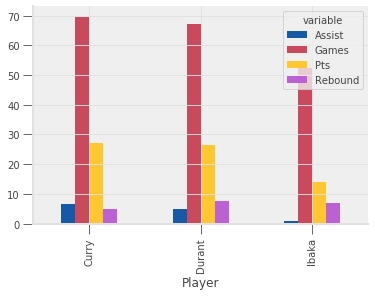

In [16]:
player_stats.unstack().plot.bar()

This particular visualization would be helpful if we wanted to see which stats
for which each player is strongest.

For example, we can see that Steph Curry scores far more points than he does
rebound, but Serge Ibaka is a bit more balanced.

What if we wanted to be able to compare all players for each statistic?

This would be easier to do if the bars were grouped by variable, with a
different bar for each player.

To plot this, we need to have the variables on the index and the player
name as column names.

We can get this DataFrame by setting `level="Player"` when calling `unstack`.

In [17]:
player_stats.unstack(level="Player")

Player,Curry,Durant,Ibaka
variable,,,
Assist,6.466667,5.066667,0.866667
Games,69.666667,67.333333,52.333333
Pts,27.266667,26.566667,13.966667
Rebound,5.000000,7.766667,6.800000


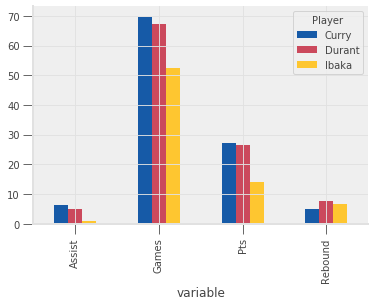

In [18]:
player_stats.unstack(level="Player").plot.bar()

Now we can use the chart to make a number of statements about players:

- Ibaka does not get many assists, compared to Curry and Durant.  
- Steph and Kevin Durant are both high scorers.  


Based on the examples above, notice a few things about `unstack`:

- It is the *inverse* of `stack`; `stack` will move labels down
  from columns to index, while `unstack` moves them up from index to columns.  
- By default, `unstack` will move the level of the index closest to the data
  and place it in the column labels closest to the data.  


>**Note**
>
>Just as we can pass multiple levels to `stack`, we can also pass multiple
levels to `unstack`.

### Summary

In some ways `set_index`, `reset_index`, `stack`, and `unstack`
are the “most fundamental” reshaping operations…

The other operations we discuss can be formulated with these
four operations (and, in fact, some of them are exactly written as these
operations in `pandas`’s code base).

*Pro tip*: We remember stack vs unstack with a mnemonic: **U**nstack moves index
levels **U**p

## `melt`

The `melt` method is used to move from wide to long form.

It can be used to move all of the “values” stored in your DataFrame to a
single column with all other columns being used to contain identifying
information.

**Warning**: When you use `melt`, any index that you currently have
will be deleted.

We saw used `melt` above when we constructed `bball_long`:

In [19]:
bball

,Year,Player,Team,TeamName,Games,Pts,Assist,Rebound
0,2015,Curry,GSW,Warriors,79,30.1,6.7,5.4
1,2016,Curry,GSW,Warriors,79,25.3,6.6,4.5
2,2017,Curry,GSW,Warriors,51,26.4,6.1,5.1
3,2015,Durant,OKC,Thunder,72,28.2,5.0,8.2
4,2016,Durant,GSW,Warriors,62,25.1,4.8,8.3
5,2017,Durant,GSW,Warriors,68,26.4,5.4,6.8
6,2015,Ibaka,OKC,Thunder,78,12.6,0.8,6.8
7,2016,Ibaka,ORL,Magic,56,15.1,1.1,6.8
8,2016,Ibaka,TOR,Raptors,23,14.2,0.7,6.8


In [20]:
# this is how we made ``bball_long``
bball.melt(id_vars=["Year", "Player", "Team", "TeamName"])

,Year,Player,Team,TeamName,variable,value
0,2015,Curry,GSW,Warriors,Games,79.0
1,2016,Curry,GSW,Warriors,Games,79.0
2,2017,Curry,GSW,Warriors,Games,51.0
3,2015,Durant,OKC,Thunder,Games,72.0
4,2016,Durant,GSW,Warriors,Games,62.0
5,2017,Durant,GSW,Warriors,Games,68.0
6,2015,Ibaka,OKC,Thunder,Games,78.0
7,2016,Ibaka,ORL,Magic,Games,56.0
8,2016,Ibaka,TOR,Raptors,Games,23.0
9,2015,Curry,GSW,Warriors,Pts,30.1


Notice that the columns we specified as `id_vars` remained columns, but all
other columns were put into two new columns:

1. `variable`: This has dtype string and contains the former column names.
  as values  
1. `value`: This has the former values.  


Using this method is an effective way to get our data in *tidy* form as noted
above.

## `pivot` and `pivot_table`

The next two reshaping methods that we will use are closely related.

Some of you might even already be familiar with these ideas because you
have previously used *pivot tables* in Excel.

- If so, good news. We think this is even more powerful than Excel
  and easier to use!  
- If not, good news. You are about to learn a very powerful and user-friendly tool.  


We will begin with `pivot`.

The `pivot` method:

- Takes the unique values of one column and places them along the index.  
- Takes the unique values of another column and places them along the
  columns.  
- Takes the values that correspond to a third column and fills in the
  DataFrame values that correspond to that index/column pair.  


We’ll illustrate with an example.

In [21]:
# .head 8 excludes Ibaka -- will discuss why later
bball.head(6).pivot(index="Year", columns="Player", values="Pts")

Player,Curry,Durant
Year,,
2015,30.1,28.2
2016,25.3,25.1
2017,26.4,26.4


We can replicate `pivot` using three of the fundamental operations
from above:

1. Call `set_index` with the `index` and `columns` arguments  
1. Extract the `values` column  
1. `unstack` the columns level of the new index  

In [22]:
#  1---------------------------------------  2---  3----------------------
bball.head(6).set_index(["Year", "Player"])["Pts"].unstack(level="Player")

Player,Curry,Durant
Year,,
2015,30.1,28.2
2016,25.3,25.1
2017,26.4,26.4


One important thing to be aware of is that in order for `pivot` to
work, the index/column pairs must be *unique*!

Below, we demonstrate the error that occurs when they are not unique.

```python
# Ibaka shows up twice in 2016 because he was traded mid-season from
# the Orlando Magic to the Toronto Raptors
bball.pivot(index="Year", columns="Player", values="Pts")
```


### `pivot_table`

The `pivot_table` method is a generalization of `pivot`.

It overcomes two limitations of `pivot`:

1. It allows you to choose multiple columns for the index/columns/values
  arguments.  
1. It allows you to deal with duplicate entries by
  having you choose how to combine them.  

In [23]:
bball

,Year,Player,Team,TeamName,Games,Pts,Assist,Rebound
0,2015,Curry,GSW,Warriors,79,30.1,6.7,5.4
1,2016,Curry,GSW,Warriors,79,25.3,6.6,4.5
2,2017,Curry,GSW,Warriors,51,26.4,6.1,5.1
3,2015,Durant,OKC,Thunder,72,28.2,5.0,8.2
4,2016,Durant,GSW,Warriors,62,25.1,4.8,8.3
5,2017,Durant,GSW,Warriors,68,26.4,5.4,6.8
6,2015,Ibaka,OKC,Thunder,78,12.6,0.8,6.8
7,2016,Ibaka,ORL,Magic,56,15.1,1.1,6.8
8,2016,Ibaka,TOR,Raptors,23,14.2,0.7,6.8


Notice that we can replicate the functionality of `pivot` if we pass
the same arguments.

In [24]:
bball.head(6).pivot(index="Year", columns="Player", values="Pts")

Player,Curry,Durant
Year,,
2015,30.1,28.2
2016,25.3,25.1
2017,26.4,26.4


But we can also choose multiple columns to be used in
index/columns/values.

In [25]:
bball.pivot_table(index=["Year", "Team"], columns="Player", values="Pts")

Player     Curry  Durant  Ibaka
Year Team                      
2015 GSW    30.1     NaN    NaN
     OKC     NaN    28.2   12.6
2016 GSW    25.3    25.1    NaN
     ORL     NaN     NaN   15.1
     TOR     NaN     NaN   14.2
2017 GSW    26.4    26.4    NaN

In [26]:
bball.pivot_table(index="Year", columns=["Player", "Team"], values="Pts")

Player Curry Durant       Ibaka            
Team     GSW    GSW   OKC   OKC   ORL   TOR
Year                                       
2015    30.1    NaN  28.2  12.6   NaN   NaN
2016    25.3   25.1   NaN   NaN  15.1  14.2
2017    26.4   26.4   NaN   NaN   NaN   NaN

AND we can deal with duplicated index/column pairs.

In [27]:
# This produced an error
# bball.pivot(index="Year", columns="Player", values="Pts")

# This doesn't!
bball_pivoted = bball.pivot_table(index="Year", columns="Player", values="Pts")
bball_pivoted

Player,Curry,Durant,Ibaka
Year,,,
2015,30.1,28.2,12.60
2016,25.3,25.1,14.65
2017,26.4,26.4,NaN


`pivot_table` handles duplicate index/column pairs using an aggregation.

By default, the aggregation is the mean.

For example, our duplicated index/column pair is `("x", 1)` and had
associated values of 2 and 5.

Notice that `bball_pivoted.loc[2016, "Ibaka"]` is `(15.1 + 14.2)/2 = 14.65`.

We can choose how `pandas` aggregates all of the values.

For example, here’s how we would keep the max.

In [28]:
bball.pivot_table(index="Year", columns="Player", values="Pts", aggfunc=max)

Player,Curry,Durant,Ibaka
Year,,,
2015,30.1,28.2,12.6
2016,25.3,25.1,15.1
2017,26.4,26.4,NaN


Maybe we wanted to count how many values there were.

In [29]:
bball.pivot_table(index="Year", columns="Player", values="Pts", aggfunc=len)

Player,Curry,Durant,Ibaka
Year,,,
2015,1.0,1.0,1.0
2016,1.0,1.0,2.0
2017,1.0,1.0,NaN


We can even pass multiple aggregation functions!

In [30]:
bball.pivot_table(index="Year", columns="Player", values="Pts", aggfunc=[max, len])

max                len             
Player Curry Durant Ibaka Curry Durant Ibaka
Year                                        
2015    30.1   28.2  12.6   1.0    1.0   1.0
2016    25.3   25.1  15.1   1.0    1.0   2.0
2017    26.4   26.4   NaN   1.0    1.0   NaN

## Visualizing Reshaping

Now that you have learned the basics and had a chance to experiment,
we will use some generic data to provide a visualization of what the above
reshape operations do.

The data we will use is:

In [31]:
# made up
# columns A and B are "identifiers" while C, D, and E are variables.
df = pd.DataFrame({
    "A": [0, 0, 1, 1],
    "B": "x y x z".split(),
    "C": [1, 2, 1, 4],
    "D": [10, 20, 30, 20,],
    "E": [2, 1, 5, 4,]
})

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
A    4 non-null int64
B    4 non-null object
C    4 non-null int64
D    4 non-null int64
E    4 non-null int64
dtypes: int64(4), object(1)
memory usage: 288.0+ bytes


,A,B,C,D,E
0,0,x,1,10,2
1,0,y,2,20,1
2,1,x,1,30,5
3,1,z,4,20,4


In [32]:
df2 = df.set_index(["A", "B"])
df2.head()

C   D  E
A B          
0 x  1  10  2
  y  2  20  1
1 x  1  30  5
  z  4  20  4

In [33]:
df3 = df2.T
df3.head()

A   0       1    
B   x   y   x   z
C   1   2   1   4
D  10  20  30  20
E   2   1   5   4

### `stack` and `unstack`

Below is an animation that shows how stacking works.

![https://datascience.quantecon.org/assets/_static/reshape_files/stack.gif](https://datascience.quantecon.org/assets/_static/reshape_files/stack.gif)  

In [34]:
df2

C   D  E
A B          
0 x  1  10  2
  y  2  20  1
1 x  1  30  5
  z  4  20  4

In [35]:
df2_stack = df2.stack()
df2_stack

A  B   
0  x  C     1
      D    10
      E     2
   y  C     2
      D    20
      E     1
1  x  C     1
      D    30
      E     5
   z  C     4
      D    20
      E     4
dtype: int64

And here is an animation that shows how unstacking works.

![https://datascience.quantecon.org/assets/_static/reshape_files/unstack_level0.gif](https://datascience.quantecon.org/assets/_static/reshape_files/unstack_level0.gif)  

In [36]:
df2

C   D  E
A B          
0 x  1  10  2
  y  2  20  1
1 x  1  30  5
  z  4  20  4

In [37]:
df2.unstack()

C               D                E          
B    x    y    z     x     y     z    x    y    z
A                                                
0  1.0  2.0  NaN  10.0  20.0   NaN  2.0  1.0  NaN
1  1.0  NaN  4.0  30.0   NaN  20.0  5.0  NaN  4.0

### `melt`

As noted above, the `melt` method transforms data from wide to long in form.

Here’s a visualization of that operation.

![https://datascience.quantecon.org/assets/_static/reshape_files/melt.gif](https://datascience.quantecon.org/assets/_static/reshape_files/melt.gif)  

In [38]:
df

,A,B,C,D,E
0,0,x,1,10,2
1,0,y,2,20,1
2,1,x,1,30,5
3,1,z,4,20,4


In [39]:
df_melted = df.melt(id_vars=["A", "B"])
df_melted

,A,B,variable,value
0,0,x,C,1
1,0,y,C,2
2,1,x,C,1
3,1,z,C,4
4,0,x,D,10
5,0,y,D,20
6,1,x,D,30
7,1,z,D,20
8,0,x,E,2
9,0,y,E,1
